In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [46]:
# data = pd.read_csv(r"C:\Users\79862\Desktop\learning\Semester 2\6208 Advanced machine learning\group\mr_cleaned.csv")
data = pd.read_csv(".\mr_cleaned.csv")
# data = pd.read_csv(".\mushrooms.csv")
data.shape

(5631, 19)

In [47]:
data.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,c,n,k,e,e,s,s,w,w,o,p,k,s,u
1,e,x,s,y,t,c,b,k,e,c,s,s,w,w,o,p,n,n,g
2,e,b,s,w,t,c,b,n,e,c,s,s,w,w,o,p,n,n,m
3,p,x,y,w,t,c,n,n,e,e,s,s,w,w,o,p,k,s,u
4,e,x,s,g,f,w,b,k,t,e,s,s,w,w,o,e,n,a,g


In [48]:
#count:总数，unique:不重复数，top：最常见类型，freq：top的次数
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-number,ring-type,spore-print-color,population,habitat
count,5631,5631,5631,5631,5631,5631,5631,5631,5631,5631,5631,5631,5631,5631,5631,5631,5631,5631,5631
unique,2,5,3,8,2,2,2,9,2,4,4,4,6,6,3,4,6,6,6
top,e,x,y,g,t,c,b,p,t,b,s,s,w,w,o,p,n,v,d
freq,3488,2840,2211,1696,3179,4620,4940,1384,2880,3771,3731,3539,3131,3083,5475,3483,1920,2160,2492


In [5]:
#factorize:类型投影为数字，corr:相关系数
# data.apply(lambda x : pd.factorize(x)[0]).corr()

In [27]:
data["class"].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [49]:
from sklearn.preprocessing import LabelEncoder
# target字母映射成数字
target = data["class"].map({'p':1, 'e':0})
target.head()

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int64

In [50]:
# 特征字母映射成数字
X = data.drop(columns=["class"])
X = X.apply(LabelEncoder().fit_transform)
X.head()
# for col in X.columns:
#     X[col] = LabelEncoder().fit_transform(X[col])

,cap-shape,cap-surface,cap-color,bruises,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-number,ring-type,spore-print-color,population,habitat
0,4,1,4,1,0,1,2,0,2,2,2,5,5,1,3,1,3,5
1,4,1,7,1,0,0,2,0,1,2,2,5,5,1,3,2,2,1
2,0,1,6,1,0,0,3,0,1,2,2,5,5,1,3,2,2,3
3,4,2,6,1,0,1,3,0,2,2,2,5,5,1,3,1,3,5
4,4,1,3,0,1,0,2,1,2,2,2,5,5,1,0,2,0,1


In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, target_train, target_test = train_test_split(X, target,test_size=0.3)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("target_train: ", target_train.shape)
print("target_test: ", target_test.shape)

X_train:  (3941, 18)
X_test:  (1690, 18)
target_train:  (3941,)
target_test:  (1690,)


In [102]:
# !pip install xgboost

In [118]:
help(XGBClassifier)

Help on class XGBClassifier in module xgboost.sklearn:

class XGBClassifier(XGBModel, sklearn.base.ClassifierMixin)
 |  XGBClassifier(*, objective='binary:logistic', use_label_encoder=True, **kwargs)
 |  
 |  Implementation of the scikit-learn API for XGBoost classification.
 |  
 |  
 |  Parameters
 |  ----------
 |  
 |      n_estimators : int
 |          Number of boosting rounds.
 |      use_label_encoder : bool
 |          (Deprecated) Use the label encoder from scikit-learn to encode the labels. For new
 |          code, we recommend that you set this parameter to False.
 |  
 |      max_depth : int
 |          Maximum tree depth for base learners.
 |      learning_rate : float
 |          Boosting learning rate (xgb's "eta")
 |      verbosity : int
 |          The degree of verbosity. Valid values are 0 (silent) - 3 (debug).
 |      objective : string or callable
 |          Specify the learning task and the corresponding learning objective or
 |          a custom objective func

In [112]:
from xgboost import XGBClassifier
model = XGBClassifier(max_depth = 5,subsample=0.8,colsample_bytree=0.8,gamma = 0)
model.fit(X_train, target_train, eval_metric="error")

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [113]:
pred = model.predict(X_test)

In [114]:
#classification_report:在报告中显示每个类的精确度，召回率，F1值
#accuracy_score(y_true, y_pred):计算精度，预测标签必须于y_true一致
#F-beta score: precision和recall的加权调和平均, 数值1达到最佳，数值0效果最差
from sklearn.metrics import classification_report,accuracy_score,fbeta_score
print(classification_report(target_test,pred))
print("accuracy is (%) =",accuracy_score(target_test,pred)*100)
print(fbeta_score(target_test, pred, beta=0.5))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1049
           1       1.00      1.00      1.00       641

    accuracy                           1.00      1690
   macro avg       1.00      1.00      1.00      1690
weighted avg       1.00      1.00      1.00      1690

accuracy is (%) = 100.0
1.0


In [109]:
#假设所有蘑菇无毒
pred_baseline = np.zeros(target_test.shape) # class=0
fbeta_score(target_test, pred_baseline, beta=0.5)

0.0

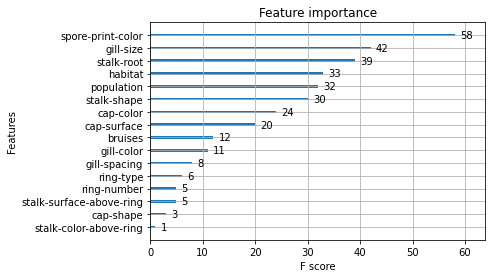

In [98]:
#特征重要性
from xgboost import plot_importance
plot_importance(model)

In [101]:
# !pip install graphviz

In [100]:
# !pip install xgboost

In [99]:
# help(plot_tree)

In [115]:
def ceate_feature_map(features):
    outfile = open('xgb.fmap', 'w')
    i = 0
    for feat in features:
        outfile.write('{0}\t{1}\tq\n'.format(i, feat))
        i = i + 1
    outfile.close()
ceate_feature_map(X_train.columns)

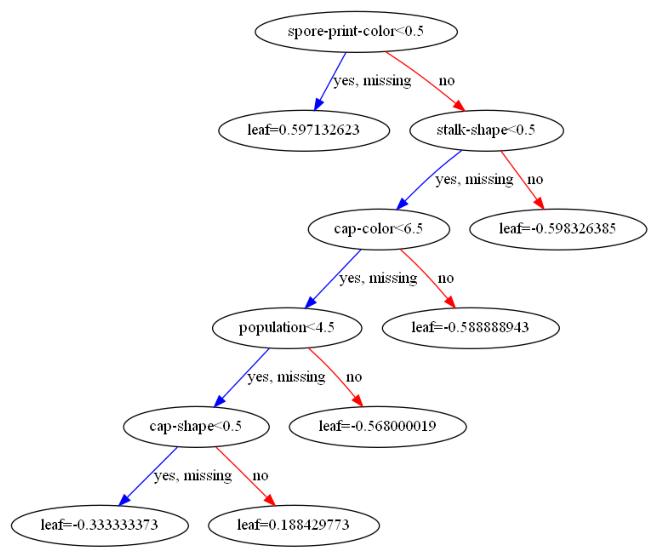

In [122]:
import xgboost
from xgboost import plot_tree
import graphviz
plot_tree(model, fmap='xgb.fmap')
fig = plt.gcf()
fig.set_size_inches(20, 10)